In [34]:
# importing all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# step 1: Data Loading and Inspection
# Load data

df=pd.read_csv("mxmh_survey_results.csv")

# Basic inspection
print("First 5 rows:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nMissing values:")
print(df.isna().sum())



First 5 rows:
            Timestamp   Age Primary streaming service  Hours per day  \
0  8/27/2022 19:29:02  18.0                   Spotify            3.0   
1  8/27/2022 19:57:31  63.0                   Pandora            1.5   
2  8/27/2022 21:28:18  18.0                   Spotify            4.0   
3  8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4  8/27/2022 21:54:47  18.0                   Spotify            4.0   

  While working Instrumentalist Composer         Fav genre Exploratory  \
0           Yes             Yes      Yes             Latin         Yes   
1           Yes              No       No              Rock         Yes   
2            No              No       No  Video game music          No   
3           Yes              No      Yes              Jazz         Yes   
4           Yes              No       No               R&B         Yes   

  Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0               Yes  ...     

In [33]:
#step2:Data cleaning with numpy and pandas
# Calculate and print median age
age_median = np.nanmedian(df['Age'])
print("Median Age:", age_median)

# Fill missing Age with median
df['Age'] = df['Age'].fillna(age_median)

# Fill missing values with the mode 
primary_service_mode = df['Primary streaming service'].mode()[0]
df['Primary streaming service'] = df['Primary streaming service'].fillna(primary_service_mode)

# Drop rows where 'Fav genre' is missing
df = df.dropna(subset=['Fav genre'])

print("\nCleaned Data:")
print(df)

# Calculate and print median age
age_median = np.nanmedian(df['Age'])
print("Median Age:", age_median)

# Fill missing Age with median
df['Age'] = df['Age'].fillna(age_median)

# Fill missing values with the mode 
primary_service_mode = df['Primary streaming service'].mode()[0]
df['Primary streaming service'] = df['Primary streaming service'].fillna(primary_service_mode)

# Drop rows where 'Fav genre' is missing
df = df.dropna(subset=['Fav genre'])

print("\nCleaned Data:")
print(df)








Median Age: 21.0

Cleaned Data:
               Timestamp   Age Primary streaming service  Hours per day  \
0     8/27/2022 19:29:02  18.0                   Spotify            3.0   
1     8/27/2022 19:57:31  63.0                   Pandora            1.5   
2     8/27/2022 21:28:18  18.0                   Spotify            4.0   
3     8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4     8/27/2022 21:54:47  18.0                   Spotify            4.0   
..                   ...   ...                       ...            ...   
731  10/30/2022 14:37:28  17.0                   Spotify            2.0   
732   11/1/2022 22:26:42  18.0                   Spotify            1.0   
733   11/3/2022 23:24:38  19.0   Other streaming service            6.0   
734   11/4/2022 17:31:47  19.0                   Spotify            5.0   
735    11/9/2022 1:55:20  29.0             YouTube Music            2.0   

    While working Instrumentalist Composer         Fav genre Explor

In [35]:
#step3:Data Analysis and Visualization
#A.Basic statistics of numpy
df=pd.read_csv("mxmh_survey_results.csv")
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("mxmh_survey_results.csv")

# Fill missing Age with median
age_median = np.nanmedian(df['Age'])
df['Age'] = df['Age'].fillna(age_median)

# Fill missing values with the mode (most common value)
primary_service_mode = df['Primary streaming service'].mode()[0]
df['Primary streaming service'] = df['Primary streaming service'].fillna(primary_service_mode)

# Drop rows where 'Fav genre' is missing
df = df.dropna(subset=['Fav genre'])

# Fill missing values for mental health scores with their respective means
df['Anxiety'] = df['Anxiety'].fillna(df['Anxiety'].mean())
df['Depression'] = df['Depression'].fillna(df['Depression'].mean())
df['OCD'] = df['OCD'].fillna(df['OCD'].mean())

# Basic statistics
print("\n Basic Statistics:")
print("Mean Age:", np.mean(df['Age']))
print("Median Anxiety:", np.median(df['Anxiety']))
print("Standard Deviation of Age:", np.std(df['Age']))
print("Mean Depression:", np.mean(df['Depression']))
print("Median OCD:", np.median(df['OCD']))
print("Standard Deviation of OCD:", np.std(df['OCD']))

# Detailed description using .describe()
print("\n Describe Age:")
print(df['Age'].describe())

print("\n  Describe Anxiety:")
print(df['Anxiety'].describe())




 Basic Statistics:
Mean Age: 25.20108695652174
Median Anxiety: 6.0
Standard Deviation of Age: 12.03957689713405
Mean Depression: 4.796195652173913
Median OCD: 2.0
Standard Deviation of OCD: 2.840085717488049

 Describe Age:
count    736.000000
mean      25.201087
std       12.047764
min       10.000000
25%       18.000000
50%       21.000000
75%       28.000000
max       89.000000
Name: Age, dtype: float64

  Describe Anxiety:
count    736.000000
mean       5.837636
std        2.793054
min        0.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: Anxiety, dtype: float64


In [20]:
#B.Advanced Pandas Operations
#Group By Analysis
genre_depression = df.groupby('Fav genre')['Depression'].mean()
print("\nAverage depression score by favorite genre:")
print(genre_depression)

# Filtering: people with high anxiety (>=4) and depression (>=4)
high_mental_health = df[(df['Anxiety'] >= 4) & (df['Depression'] >= 4)]
print("\nPeople with high anxiety and depression:")
print(high_mental_health)
print("Total:", len(high_mental_health))



Average depression score by favorite genre:
Fav genre
Classical           4.075472
Country             4.320000
EDM                 5.243243
Folk                5.066667
Gospel              2.666667
Hip hop             5.800000
Jazz                4.500000
K pop               4.423077
Latin               3.000000
Lofi                6.600000
Metal               5.068182
Pop                 4.486842
R&B                 3.828571
Rap                 4.000000
Rock                5.236702
Video game music    4.477273
Name: Depression, dtype: float64

People with high anxiety and depression:
               Timestamp   Age Primary streaming service  Hours per day  \
2     8/27/2022 21:28:18  18.0                   Spotify            4.0   
3     8/27/2022 21:40:40  61.0             YouTube Music            2.5   
5     8/27/2022 21:56:50  18.0                   Spotify            5.0   
6     8/27/2022 22:00:29  18.0             YouTube Music            3.0   
10    8/27/2022 22:51:15  18.0 

In [29]:
#C.Pivot tables
# Pivot Table 1: Average Anxiety and Depression by Favorite Genre
pivot_avg_scores = df.pivot_table(
    values=['Anxiety', 'Depression'],
    index='Fav genre',
    aggfunc='mean'
).round(2)

print("Pivot Table 1: Average Mental Health Scores by Favorite Genre")
print(pivot_avg_scores)

# Pivot Table 2: Count of users by Streaming Service and Instrumentalist status
pivot_streaming_instrumentalist = df.pivot_table(
    values='Age',  # You can use any column just to count rows
    index='Primary streaming service',
    columns='Instrumentalist',
    aggfunc='count',
    fill_value=0
)

print("\nPivot Table 2: Count of Users by Streaming Service & Instrumentalist Status")
print(pivot_streaming_instrumentalist)



Pivot Table 1: Average Mental Health Scores by Favorite Genre
                  Anxiety  Depression
Fav genre                            
Classical            4.89        4.08
Country              5.40        4.32
EDM                  5.49        5.24
Folk                 6.57        5.07
Gospel               4.83        2.67
Hip hop              6.20        5.80
Jazz                 5.90        4.50
K pop                6.23        4.42
Latin                4.33        3.00
Lofi                 6.10        6.60
Metal                5.76        5.07
Pop                  6.07        4.49
R&B                  5.17        3.83
Rap                  5.09        4.00
Rock                 6.12        5.24
Video game music     5.89        4.48

Pivot Table 2: Count of Users by Streaming Service & Instrumentalist Status
Instrumentalist                     No  Yes
Primary streaming service                  
Apple Music                         35   16
I do not use a streaming service.   48   23
O

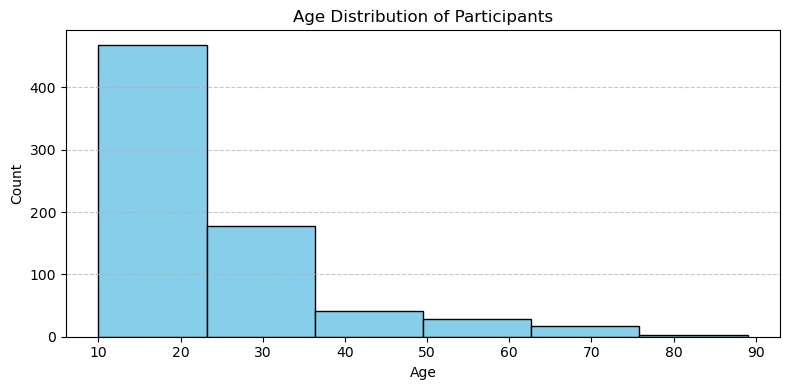

In [22]:
#step 4:Data Visualization
#A.Basic Matplotlib Plots
#Histogram for ages
# Plot: Histogram of Age
plt.figure(figsize=(8, 4))
plt.hist(df['Age'], bins=6, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Participants')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



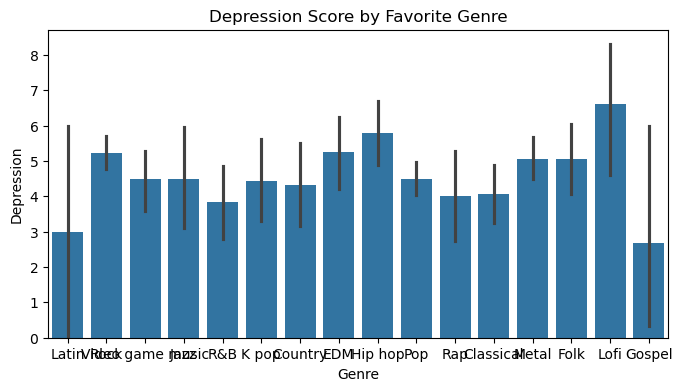

In [24]:
#B.Seaborn Visualizations
# Plot: Barplot without any extra styling
plt.figure(figsize=(8, 4))
sns.barplot(x='Fav genre', y='Depression', data=df)
plt.title('Depression Score by Favorite Genre')
plt.xlabel('Genre')
plt.ylabel('Depression')
plt.show()


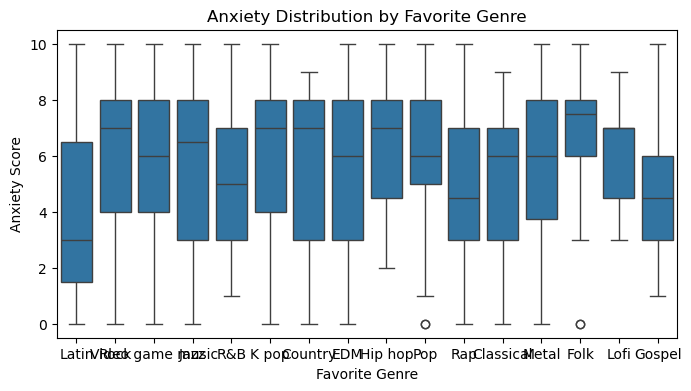

In [23]:
#C.Advanced Seaborn plot
# Plot: Boxplot of Anxiety by Genre
plt.figure(figsize=(8, 4))
sns.boxplot(x='Fav genre', y='Anxiety', data=df)
plt.title('Anxiety Distribution by Favorite Genre')
plt.xlabel('Favorite Genre')
plt.ylabel('Anxiety Score')
plt.show()


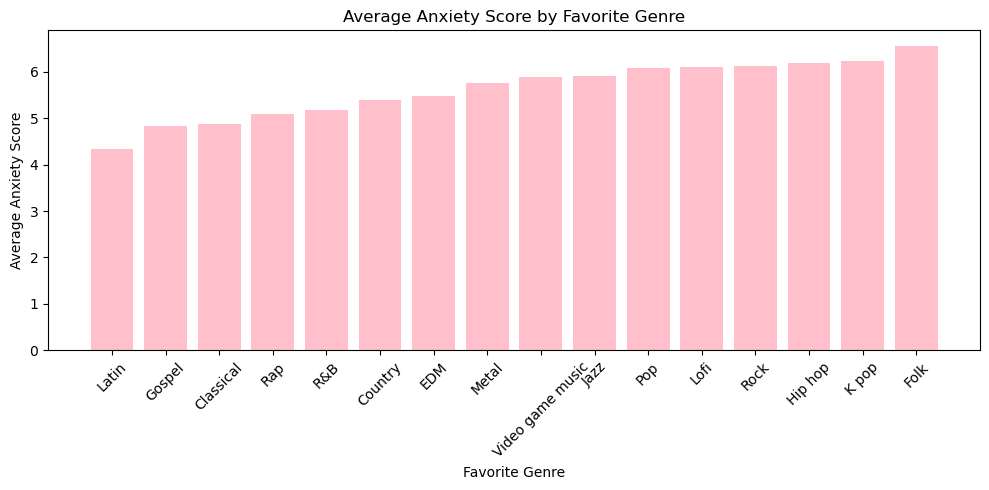

In [28]:
#D.Using Bar Graphs
# Group by genre and calculate mean Anxiety
genre_anxiety = df.groupby('Fav genre')['Anxiety'].mean().sort_values()

# Plot bar graph
plt.figure(figsize=(10, 5))
plt.bar(genre_anxiety.index, genre_anxiety.values, color='pink')

plt.title('Average Anxiety Score by Favorite Genre')
plt.xlabel('Favorite Genre')
plt.ylabel('Average Anxiety Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


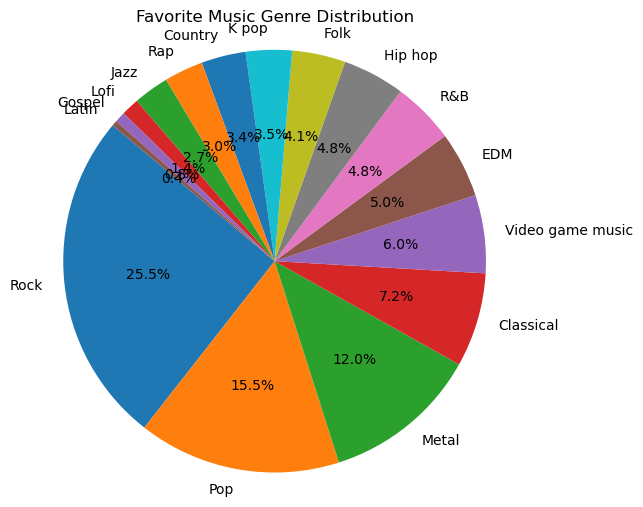

In [25]:
#E.Using Pie charts
# Count frequency of each genre
genre_counts = df['Fav genre'].value_counts()
# Plot Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Favorite Music Genre Distribution')
plt.axis('equal')  
plt.show()


In [37]:
#Step 5: Advanced Numpy Operations
# Drop rows with missing Age
df = df.dropna(subset=['Age'])
# Z-score normalization of Age
age_mean = np.mean(df['Age'])
age_std = np.std(df['Age'])
df['Age_zscore'] = (df['Age'] - age_mean) / age_std
# Boolean indexing to filter young adults (18–25)
ages = df['Age'].values
young_adults = df[np.logical_and(ages >= 18, ages <= 25)]
# Output results
print("Full Cleaned Data with Z-score:\n", df)
print("\n Young Adults (18–25):", len(young_adults))
print(young_adults[['Age', 'Depression', 'Hours per day', 'Fav genre']])
#Merging two datasets
import pandas as pd
import numpy as np
# Load the dataset
df = pd.read_csv("mxmh_survey_results.csv")
# Handle missing values
df['Age'] = df['Age'].fillna(np.nanmedian(df['Age']))
df['Anxiety'] = df['Anxiety'].fillna(np.mean(df['Anxiety']))
df['Depression'] = df['Depression'].fillna(np.mean(df['Depression']))
df['OCD'] = df['OCD'].fillna(np.mean(df['OCD']))
df = df.dropna(subset=['Fav genre'])
#  Add a User ID column
df['User ID'] = df.index
# Add a new column: Mood Score
df['Mood Score'] = df['Anxiety'] + df['Depression'] + df['OCD']
#  Create two separate dataframes
df1 = df[['User ID', 'Age']]
df2 = df[['User ID', 'Mood Score']]
#  Merge the dataframes on 'User ID'
merged_df = pd.merge(df1, df2, on='User ID')
#  Show merged result
print("\n Merged DataFrame (User ID, Age, Mood Score):")
print(merged_df.head())
#Adding column to the dataset
# Add a new column 'Mood Score' to the DataFrame
df['Mood Score'] = df['Anxiety'] + df['Depression'] + df['OCD']
# Show the updated DataFrame with the new column
print("\n New column 'Mood Score' added:")
print(df[['Anxiety', 'Depression', 'OCD', 'Mood Score']].head())




Full Cleaned Data with Z-score:
                Timestamp   Age Primary streaming service  Hours per day  \
0     8/27/2022 19:29:02  18.0                   Spotify            3.0   
1     8/27/2022 19:57:31  63.0                   Pandora            1.5   
2     8/27/2022 21:28:18  18.0                   Spotify            4.0   
3     8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4     8/27/2022 21:54:47  18.0                   Spotify            4.0   
..                   ...   ...                       ...            ...   
731  10/30/2022 14:37:28  17.0                   Spotify            2.0   
732   11/1/2022 22:26:42  18.0                   Spotify            1.0   
733   11/3/2022 23:24:38  19.0   Other streaming service            6.0   
734   11/4/2022 17:31:47  19.0                   Spotify            5.0   
735    11/9/2022 1:55:20  29.0             YouTube Music            2.0   

    While working Instrumentalist Composer         Fav genre Explo